In [1]:
import os
import sys
import tensorflow as tf

path_to_add = os.path.abspath(os.path.join('..', 'src'))
if path_to_add in sys.path:
    sys.path.remove(path_to_add)
sys.path.append(path_to_add)

from utils.evaluate import evaluate_models
from utils.metrics import dice_loss, iou_metric

images_dir = r'.\data\processed\images\has_pneumo\test'
masks_dir = r'.\data\processed\mask\has_pneumo\test'

## So sánh tốc độ học (1e-4 và 1e-5)

Đang đánh giá trên ảnh: 76_test_1.png
1/1 [==============================] - 1s 924ms/step
UNet - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, IoU: 0.0000, Dice: 0.0000
FCN - Precision: 0.0525, Recall: 0.4463, F1 Score: 0.0939, IoU: 0.0493, Dice: 0.0939
SegNet - Precision: 0.3049, Recall: 0.2999, F1 Score: 0.3024, IoU: 0.1781, Dice: 0.3024
UNet++ - Precision: 0.1717, Recall: 0.2267, F1 Score: 0.1954, IoU: 0.1083, Dice: 0.1954


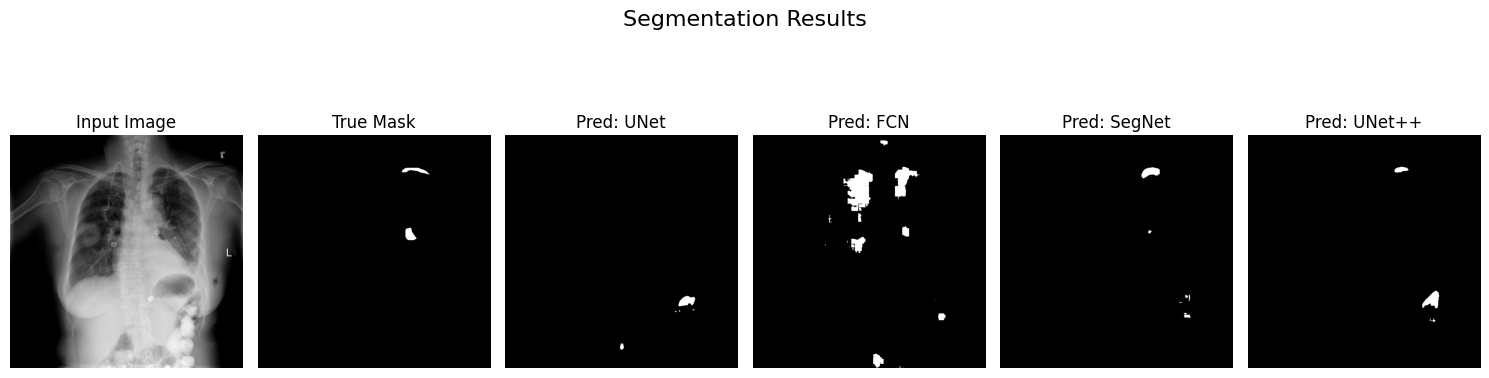

In [2]:
models = {
    "UNet": tf.keras.models.load_model(r".\experiments\unet_experiment\unet_model_epoch50_lr1e_4.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric}),
    "FCN": tf.keras.models.load_model(r".\experiments\fcn_experiment\fcn_model_epoch50_lr1e_4.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric}),
    "SegNet": tf.keras.models.load_model(r".\experiments\segnet_experiment\segnet_model_epoch50_lr1e_4.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric}),
    "UNet++": tf.keras.models.load_model(r".\experiments\unetpp_experiment\unetpp_model_epoch50_lr1e_4.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric})
}

evaluate_models(models, images_dir, masks_dir, threshold=0.5)

Đang đánh giá trên ảnh: 1314_test_1.png
1/1 [==============================] - 1s 1s/step
UNet - Precision: 0.7629, Recall: 0.6884, F1 Score: 0.7237, IoU: 0.5670, Dice: 0.7237
FCN - Precision: 0.0877, Recall: 0.8354, F1 Score: 0.1588, IoU: 0.0862, Dice: 0.1588
SegNet - Precision: 0.7367, Recall: 0.7278, F1 Score: 0.7322, IoU: 0.5776, Dice: 0.7322
UNet++ - Precision: 0.7992, Recall: 0.7611, F1 Score: 0.7797, IoU: 0.6389, Dice: 0.7797


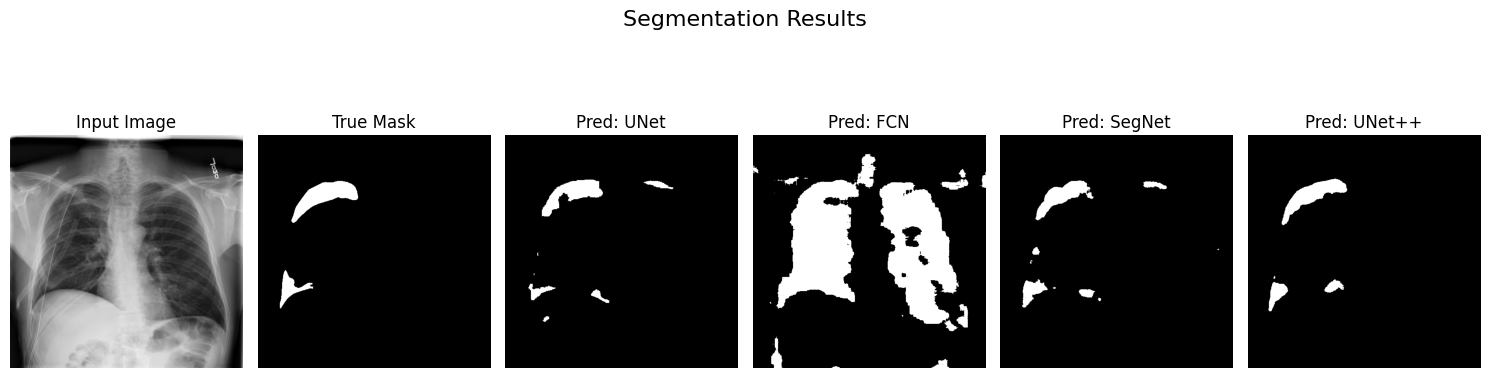

In [2]:
models = {
    "UNet": tf.keras.models.load_model(r".\experiments\unet_experiment\unet_model_epoch50_lr1e_5.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric}),
    "FCN": tf.keras.models.load_model(r".\experiments\fcn_experiment\fcn_model_epoch50_lr1e_5.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric}),
    "SegNet": tf.keras.models.load_model(r".\experiments\segnet_experiment\segnet_model_epoch50_lr1e_5.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric}),
    "UNet++": tf.keras.models.load_model(r".\experiments\unetpp_experiment\unetpp_model_epoch50_lr1e_5.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric})
}

evaluate_models(models, images_dir, masks_dir, threshold=0.5)

## So sánh batch size

Đang đánh giá trên ảnh: 1314_test_1.png
1/1 [==============================] - 1s 766ms/step
UNet - Precision: 0.8697, Recall: 0.6471, F1 Score: 0.7421, IoU: 0.5899, Dice: 0.7421
SegNet - Precision: 0.8351, Recall: 0.5387, F1 Score: 0.6549, IoU: 0.4869, Dice: 0.6549
UNet++ - Precision: 0.7159, Recall: 0.6315, F1 Score: 0.6711, IoU: 0.5050, Dice: 0.6711


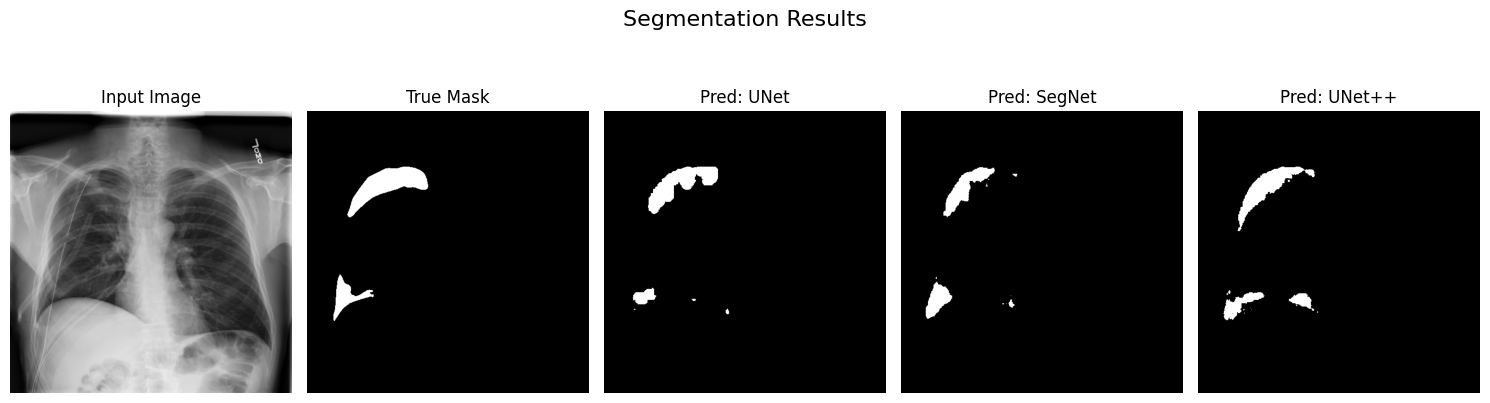

In [2]:
models = {
    "UNet": tf.keras.models.load_model(r".\experiments\unet_experiment\unet_model_epoch50_batch2_lr1e_5.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric}),
    "SegNet": tf.keras.models.load_model(r".\experiments\segnet_experiment\segnet_model_epoch50_batch2_lr1e_5.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric}),
    "UNet++": tf.keras.models.load_model(r".\experiments\unetpp_experiment\unetpp_model_epoch50_batch2_lr1e_5.keras", custom_objects={"dice_loss": dice_loss, "iou_metric": iou_metric})
}

evaluate_models(models, images_dir, masks_dir, threshold=0.5)

## So sánh hàm mất mát BinCross và Dice

Đang đánh giá trên ảnh: 1314_test_1.png
1/1 [==============================] - 2s 2s/step
SegNet - Precision: 0.9749, Recall: 0.2516, F1 Score: 0.4000, IoU: 0.2500, Dice: 0.4000
UNet++ - Precision: 0.9870, Recall: 0.4203, F1 Score: 0.5896, IoU: 0.4180, Dice: 0.5896


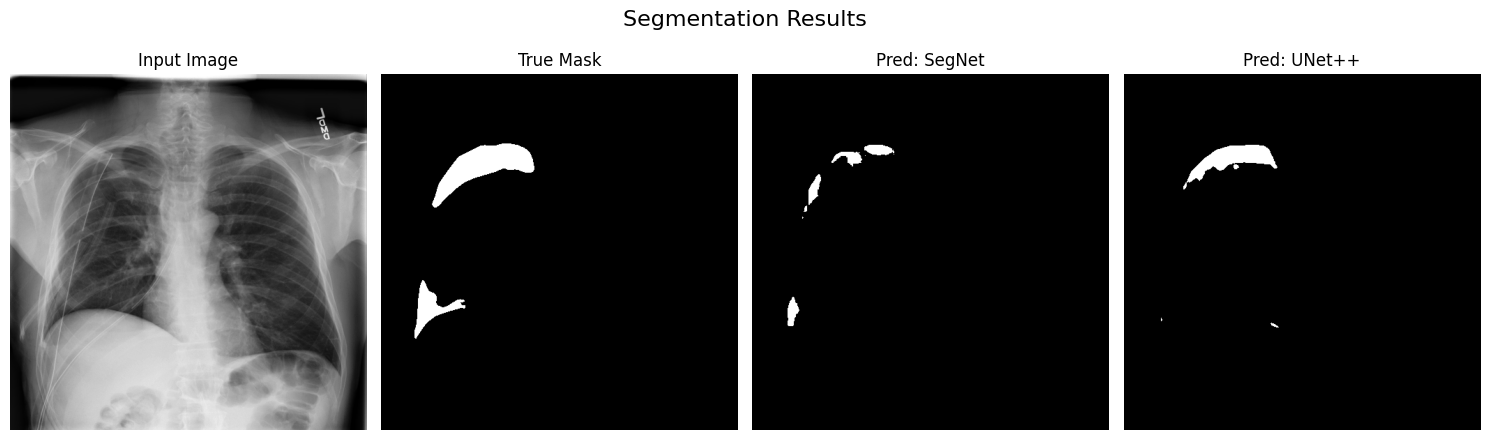

In [2]:
loss = tf.keras.losses.BinaryCrossentropy()

models = {
    "SegNet": tf.keras.models.load_model(r".\experiments\segnet_experiment\segnet_model_epoch50_bincross_lr1e_4.keras", custom_objects={"dice_loss": loss, "iou_metric": iou_metric}),
    "UNet++": tf.keras.models.load_model(r".\experiments\unetpp_experiment\unetpp_model_epoch50_bincross_lr1e_4.keras", custom_objects={"dice_loss": loss, "iou_metric": iou_metric})
}

evaluate_models(models, images_dir, masks_dir, threshold=0.5)